In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics
#Preparing data
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
#convert the predictors and the target variable to dataframes
iris_predictors = pd.DataFrame(iris.data)
iris_target = pd.DataFrame(iris.target)

In [5]:
from sklearn.model_selection import train_test_split
pred_train, pred_test, tar_train, tar_test  =  train_test_split(iris_predictors, iris_target, test_size=.2)

In [6]:
#build the random forest model
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
rf=classifier.fit(pred_train,tar_train)
rf.predictions=classifier.predict(pred_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [7]:
# help(RandomForestClassifier)

In [8]:
print(rf.feature_importances_)

[0.07949422 0.02291241 0.43612343 0.46146994]


In [9]:
#display the confusion matrix
sklearn.metrics.confusion_matrix(tar_test,rf.predictions)

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 10]])

In [10]:
#calculate the accuracy
sklearn.metrics.accuracy_score(tar_test, rf.predictions)

0.9666666666666667

In [11]:
#Checking how many trees will return the best result
trees=range(100)
accuracy=np.zeros(100)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   rf=classifier.fit(pred_train,tar_train)
   rf.predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, rf.predictions)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConv

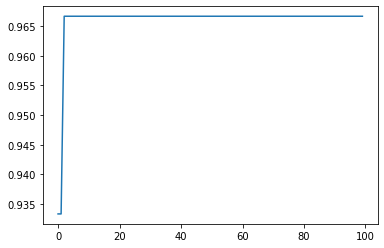

In [12]:
%matplotlib inline
plt.cla()
plt.plot(trees, accuracy)

In [13]:
#Build Naive Bayes model on training data
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
gnb = classifier.fit(pred_train,tar_train)
gnb.predictions=gnb.predict(pred_test)

/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
sklearn.metrics.confusion_matrix(tar_test,gnb.predictions)

array([[11,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 10]])

In [15]:
sklearn.metrics.accuracy_score(tar_test, gnb.predictions)

0.9333333333333333

In [16]:
#Build KNN model
from sklearn import neighbors
classifier = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn = classifier.fit(pred_train,tar_train)
knn.predictions = knn.predict(pred_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [17]:
sklearn.metrics.confusion_matrix(tar_test,knn.predictions)

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 10]])

In [18]:
sklearn.metrics.accuracy_score(tar_test, knn.predictions)

0.9666666666666667

In [19]:
type(tar_train)

pandas.core.frame.DataFrame

In [20]:
tar_train = np.ravel(tar_train)
type(tar_train)

numpy.ndarray

In [21]:
#Checking how many trees will return the best result
trees=range(1000)
accuracy=np.zeros(1000)

for idx in range(1000):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   rf=classifier.fit(pred_train,tar_train)
   rf.predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, rf.predictions)

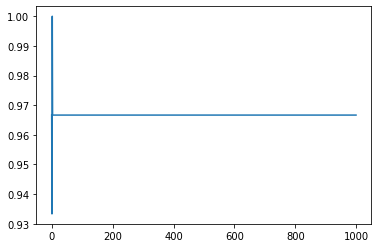

In [22]:
%matplotlib inline
plt.cla()
plt.plot(trees, accuracy)
